In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib import pyplot

a) Mostrar que el tiempo de viaje del pulso de luz está dado por:
$$ct(x)=n_0 \sqrt{(x-T[0])^2 + T[1]^2} + n_1 \sqrt{(x-R[0])^2 + R[1]^2}$$

Hay tres puntos importantes para esta situación, la posición del transmisor $T$, la posición del receptor $R$, y el punto en donde incide la luz emitida por el transmisor en la superficie del agua $X$. Cabe destacar, que en el sistema de coordenadas, el cero en el eje y es el nivel del agua.

En segundo lugar, hay que tener en cuenta las relaciones que involucran la velocidad de la luz en ambos medios, los índices de refracción, las distancias y el tiempo:

$$n=\frac{c}{v} \Rightarrow v=\frac{c}{n}$$

$$v=\frac{d}{t} \Rightarrow t=\frac{d}{v}$$

Entonces:

$$t=\frac{d}{v}=\frac{d}{\frac{c}{n}}=\frac{dn}{c}$$

Con esto en mente, es posible formular una expresión para cada una de las dos distancias que hay (antes de X y después de X)

$$d_0=||X-T||=\sqrt{(X_x-T_x)^2+(X_y-T_y)^2}=\sqrt{(X_x-T_x)^2+T_y^2}$$
$$d_1=||X-R||=\sqrt{(X_x-R_x)^2+(X_y-R_y)^2}=\sqrt{(X_x-R_x)^2+R_y^2}$$

Seguidamente, reemplazamos las expresiones para las distancias en la ecuación del tiempo:
$$t_0=\frac{d_0n_0}{c}=\frac{n_0\sqrt{(X_x-T_x)^2+T_y^2}}{c}$$

$$t_1=\frac{d_1n_1}{c}=\frac{n_1\sqrt{(X_x-R_x)^2+R_y^2}}{c}$$

De este modo, el tiempo total es igual a la suma de los dos tiempos, lo cual tiene la siguiente forma:
$$t=\frac{n_0\sqrt{(X_x-T_x)^2+T_y^2}+n_1\sqrt{(X_x-R_x)^2+R_y^2}}{c}$$


Así que, finalmente se tiene que:
$$ct(x)=n_0\sqrt{(X_x-T_x)^2+T_y^2}+n_1\sqrt{(X_x-R_x)^2+R_y^2}$$

Lo cual escrito con la sintaxis de Python, se vería de la siguiente forma:

$$ct(x)=n_0 \sqrt{(x-T[0])^2 + T[1]^2} + n_1 \sqrt{(x-R[0])^2 + R[1]^2}$$

In [26]:
T = np.array([-3,2])
R = np.array([2,-2])
A = 0

def t(x):
    T = np.array([-3,2])
    R = np.array([2,-2])
    n_0 = 1
    n_1 = 1.33
    tiempo = n_0*np.sqrt((x-T[0])**2+T[1]**2) + n_1*np.sqrt((x-R[0])**2+R[1]**2)
    tiempo = tiempo/300000000 #m/s
    
    return tiempo

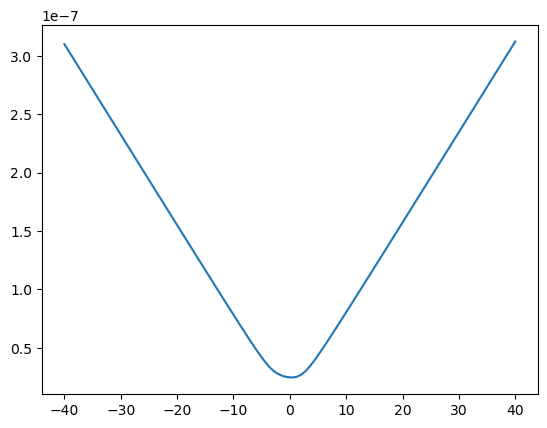

In [43]:
X = np.linspace(-40,40,100)
plt.plot(X,t(X))

In [28]:
def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-6):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn
    
def Derivative(f,x,h=1e-5):
    return (f(x+h)-f(x-h))/(2*h)

def GetAllRoots(Function,x,tolerancia=6):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonRaphson(Function,Derivative,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
        
    return Roots

In [29]:
extremos = GetAllRoots(t,X)
extremos

array([-0.246479, 39.930572, 39.930574, 39.930575])

In [30]:
def D2(f,x,h):
    d2= (f(x+h)-(2*f(x))+ f(x-h))/(h**2)
    return d2

In [31]:
D2(t,extremos,1e-5)

array([9.89969757e-10, 5.29395592e-13, 5.29395592e-13, 0.00000000e+00])

In [37]:
X=np.array([extremos[1],0])

In [42]:
X

array([39.930572,  0.      ])

In [38]:
a_0 = np.arccos(T[1]/np.sqrt((X[0]-T[0])**2+T[1]**2))
a_1 = np.arccos(R[1]/np.sqrt((R[0]-X[0])**2+R[1]**2))
a_0,a_1

(1.5242431387389144, 1.6234754584733615)

In [39]:
n_0 = 1
n_1 = 1.33
n_0/n_1

0.7518796992481203

In [40]:
np.sin(a_1)/np.sin(a_0)

0.9996958498512274

In [41]:
# n0/n1 no es igual a sin(a1)/sin(a0) la ley de Snell no se cumple en este caso.